## Here is the background information on your task

You are part of retail analytics team and have been approached by your client, the Category Manager for Chips, who wants to better understand the types of customers who purchase Chips and their purchasing behaviour within the region.

Remember, our end goal is to form a strategy based on the findings to provide a clear recommendation to Julia the Category Manager so make sure your insights can have a commercial application.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import warnings
warnings.filterwarnings("ignore")


In [2]:
customers = pd.read_csv('.\\data\\QVI_purchase_behaviour.csv')
customers.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [3]:
transaction = pd.read_excel('.\\data\\QVI_transaction_data.xlsx')
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


#### <font color=blue> I don't like the title letters in the column names and the date as a number </font>

In [4]:
customers.columns = customers.columns.str.lower()
transaction.columns = transaction.columns.str.lower()

In [5]:
start_date = pd.to_datetime('1899-12-30')
transaction['date'] = transaction['date'].apply(lambda x: start_date + pd.Timedelta(days=x))

In [6]:
customers.info(), transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   lylty_card_nbr    72637 non-null  int64 
 1   lifestage         72637 non-null  object
 2   premium_customer  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            264836 non-null  datetime64[ns]
 1   store_nbr       264836 non-null  int64         
 2   lylty_card_nbr  264836 non-null  int64         
 3   txn_id          264836 non-null  int64         
 4   prod_nbr        264836 non-null  int64         
 5   prod_name       264836 non-null  object        
 6   prod_qty        264836 non-null  int64         
 7   tot_sales       2648

(None, None)

#### <font color=blue> I want to see the distribution in the database with customers
 </font>

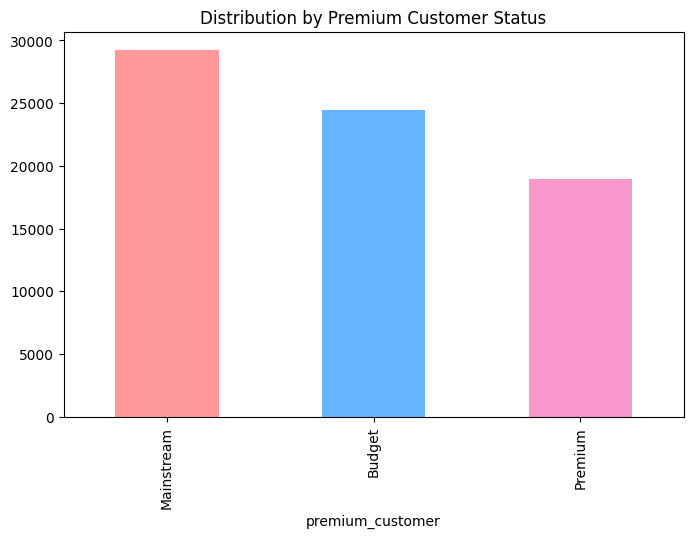

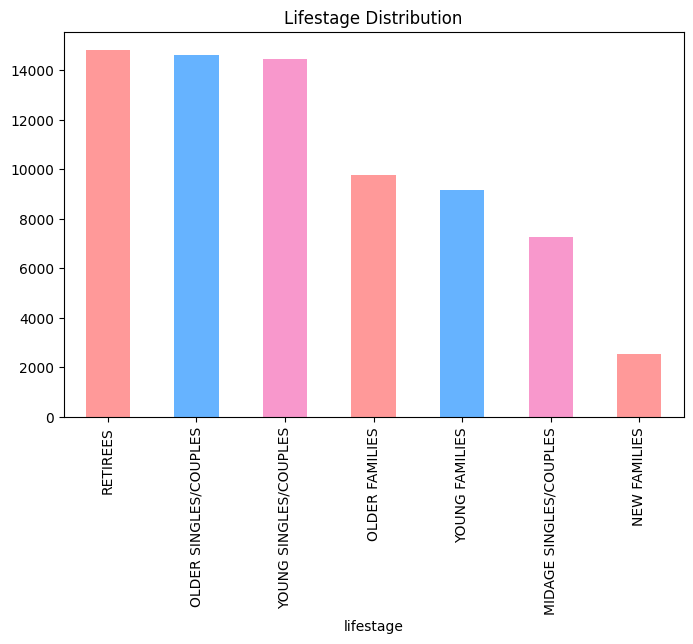

In [7]:

# Plot distribution by Premium Customer Status
plt.figure(figsize=(8, 5))
customers.premium_customer.value_counts().plot(kind='bar', color=['#FF9999', '#66B3FF', '#F898CC'])
plt.title('Distribution by Premium Customer Status')
plt.show()

# Plot Lifestage Distribution
plt.figure(figsize=(8, 5))
customers.lifestage.value_counts().plot(kind='bar', color=['#FF9999', '#66B3FF', '#F898CC'])
plt.title('Lifestage Distribution')
plt.show()



#### <font color=blue> Let's look at the duplicates
 </font>

In [8]:
transaction.duplicated().sum()

np.int64(1)

In [9]:
transaction.drop_duplicates(inplace=True)
transaction.duplicated().sum()

np.int64(0)

#### <font color=blue> Add columns with customer types to the table with transactions
 </font>

In [10]:
df = pd.merge(transaction, customers, on='lylty_card_nbr')
df.head()

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,lifestage,premium_customer
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [11]:
df.shape, transaction.shape, customers.shape

((264835, 10), (264835, 8), (72637, 3))

#### <font color=blue> We only need chips
 </font>

In [12]:
# regex to find chips and crisps and 'RRD' products in product name 
chips_products = df[df['prod_name'].str.contains(r'\b(Chips?)\b|\b(Chps?)\b|\b(red)\b |\b(rrd)\b|\b(Crisps?)\b', case=False, regex=True, na=False)]

#### <font color=blue> Add a few necessary columns such as brand and weight
 </font>

In [13]:

chips_products['brand'] = chips_products['prod_name'].str.split().str[0]

In [14]:

chips_products['weight'] = chips_products['prod_name'].str[-4:]

In [15]:
chips_products[['prod_qty', 'tot_sales']].describe()

,prod_qty,tot_sales
count,101986.000000,101986.000000
mean,1.907154,6.738020
std,0.943519,3.733085
min,1.000000,1.700000
25%,2.000000,5.400000
50%,2.000000,6.600000
75%,2.000000,7.800000
max,200.000000,650.000000


#### <font color=blue> I see an outlier in the data, let's take a closer look
 </font>

In [16]:
chips_products[chips_products['prod_qty'] == 200]

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,lifestage,premium_customer,brand,weight
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium,Dorito,380g
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium,Dorito,380g


In [17]:
chips_products = chips_products[chips_products['lylty_card_nbr'] != 226000]


In [18]:
chips_products[['prod_qty', 'tot_sales']].describe()

,prod_qty,tot_sales
count,101984.000000,101984.000000
mean,1.903269,6.725405
std,0.347382,2.412724
min,1.000000,1.700000
25%,2.000000,5.400000
50%,2.000000,6.600000
75%,2.000000,7.800000
max,5.000000,29.500000


In [19]:
chips_products.brand.unique()

array(['Natural', 'Smiths', 'Doritos', 'Thins', 'Red', 'Dorito',
       'Tyrrells', 'Cobs', 'French', 'Pringles', 'RRD', 'WW', 'Snbts',
       'Sunbites'], dtype=object)

#### <font color=blue> Many identical brands are recorded differently let's combine them
 </font>

In [20]:
chips_products['brand'] = chips_products['brand'].replace('Dorito', 'Doritos')

In [21]:
chips_products['brand'] = chips_products['brand'].replace('Red', 'RRD')


In [22]:
chips_products['brand'] = chips_products['brand'].replace('Snbts', 'Sunbites')

In [23]:
chips_products['weight'].unique()

array(['175g', '170g', '330g', '150g', '150G', '380g', '165g', '110g',
       '134g', '200g', '160g', ' 90g'], dtype=object)

In [24]:
chips_products['weight'] = chips_products['weight'].replace('150G', '150g')

In [25]:
chips_products.head()

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,lifestage,premium_customer,brand,weight
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural,175g
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths,170g
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,Smiths,175g
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,MIDAGE SINGLES/COUPLES,Budget,Smiths,330g
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,MIDAGE SINGLES/COUPLES,Budget,Doritos,150g


#### <font color=blue> What volume of packaging is sold more?
 </font>

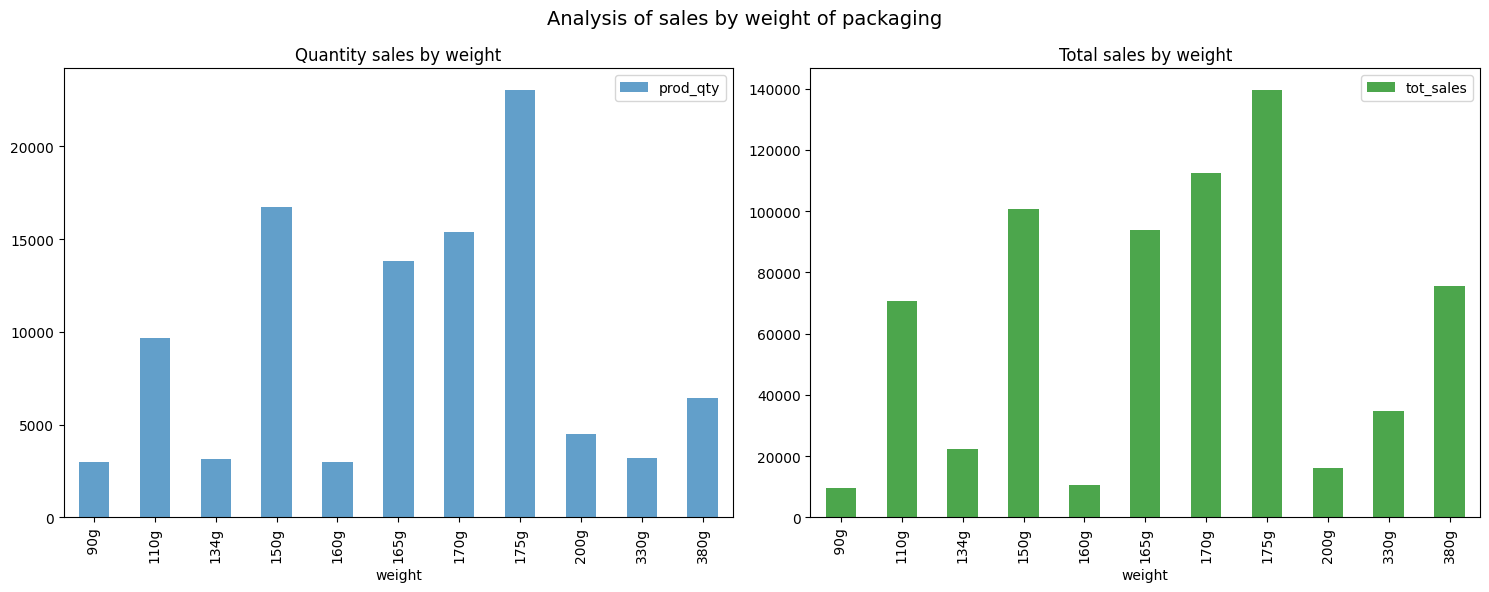

In [26]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))


chips_products.groupby(['weight']).agg({'prod_qty':'count'}).sort_index().plot(
    kind='bar', 
    alpha=0.7,
    ax=ax1 
)
ax1.set_title('Quantity sales by weight')


chips_products.groupby(['weight']).agg({'tot_sales':'sum'}).sort_index().plot(
    kind='bar', 
    color='green', 
    alpha=0.7,
    ax=ax2  
)
ax2.set_title('Total sales by weight')


plt.suptitle('Analysis of sales by weight of packaging', fontsize=14)
plt.tight_layout()
plt.show()

#### <font color=blue> How many brands produce their products in each weight?
 </font>

In [27]:
chips_products.groupby('weight').agg({'brand': 'nunique'}).sort_values('brand', ascending=False)


,brand
weight,
175g,4
150g,2
170g,2
380g,2
165g,2
90g,1
110g,1
134g,1
160g,1


In [28]:
chips_products.groupby('weight')['brand'].unique()

weight
 90g                          [Sunbites]
110g                              [Cobs]
134g                          [Pringles]
150g                      [Doritos, RRD]
160g                                [WW]
165g                     [Tyrrells, RRD]
170g                   [Smiths, Doritos]
175g    [Natural, Smiths, Thins, French]
200g                                [WW]
330g                            [Smiths]
380g                   [Doritos, Smiths]
Name: brand, dtype: object

In [29]:
chips_products.groupby('weight')['prod_qty'].agg(['mean', 'sum']).sort_values('sum', ascending=False)


,mean,sum
weight,,
175g,1.902645,43875
150g,1.900705,31833
170g,1.904821,29359
165g,1.900643,26322
110g,1.915919,18571
380g,1.912874,12273
200g,1.883523,8425
330g,1.909916,6106
134g,1.914159,6043


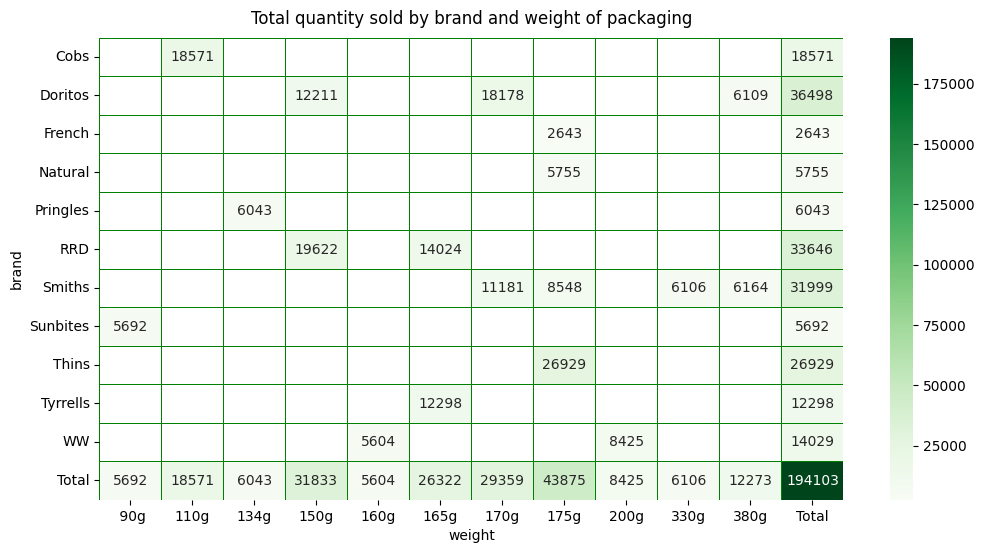

In [30]:
pivot_brand_weight = chips_products.pivot_table(
    index='brand',
    columns='weight',
    values='prod_qty',
    aggfunc='sum',
    margins=True,
    margins_name='Total'
)
plt.figure(figsize=(12, 6))
plt.title('Total quantity sold by brand and weight of packaging',pad=10)

sns.heatmap(pivot_brand_weight, annot=True, fmt='.0f', cmap='Greens', linewidths=0.5, linecolor='green');


#### <font color=blue> Let's make a column with a weight category.
 </font>

In [31]:

conditions = [
    chips_products['weight'].isin([' 90g', '110g', '134g']),
    chips_products['weight'].isin(['150g', '160g', '165g', '175g', '170g']),
    chips_products['weight'].isin(['200g']),
    chips_products['weight'].isin(['330g', '380g'])
]

choices = ['small', 'medium', 'big', 'large']


chips_products['weight_category'] = np.select(conditions, choices, default='unknown')


chips_products.groupby('weight_category')['weight'].unique()

weight_category
big                               [200g]
large                       [330g, 380g]
medium    [175g, 170g, 150g, 165g, 160g]
small                 [110g, 134g,  90g]
Name: weight, dtype: object

<Figure size 1200x600 with 0 Axes>

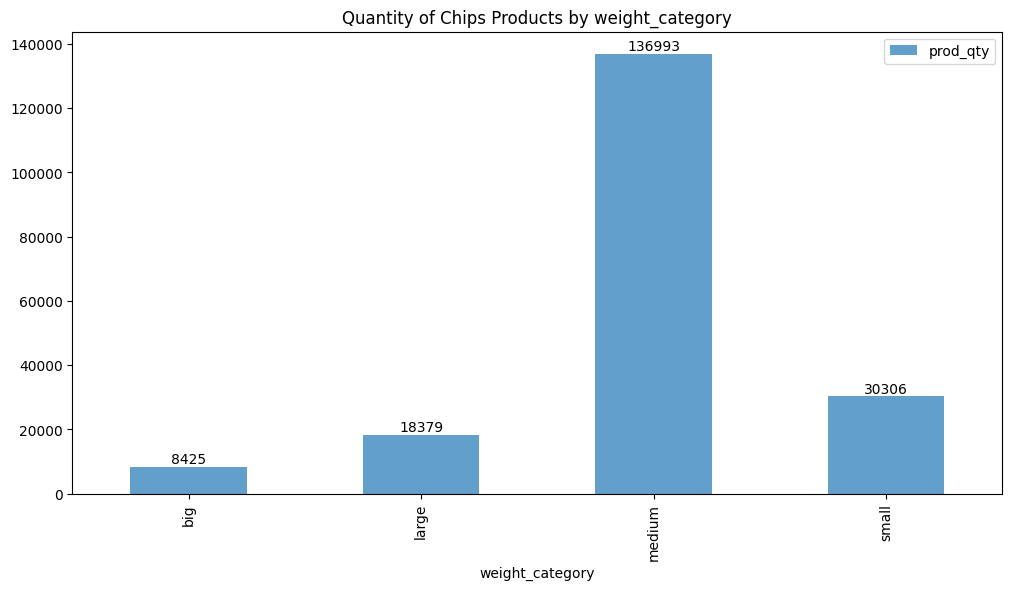

<Figure size 1200x600 with 0 Axes>

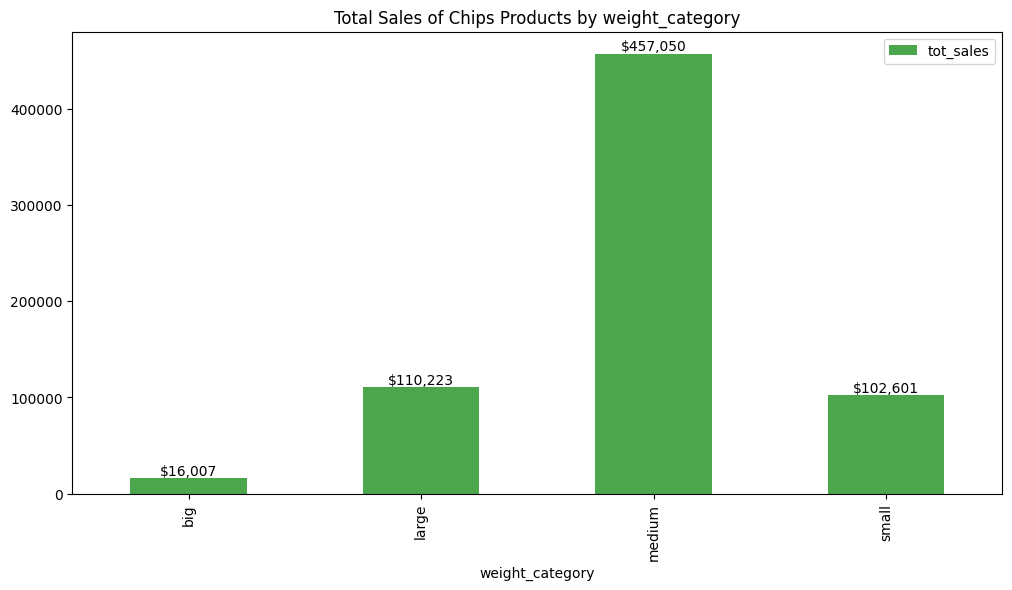

In [32]:
plt.figure(figsize=(12, 6))
ax = chips_products.groupby(['weight_category']).agg({'prod_qty':'sum'}).sort_index().plot(figsize=(12, 6), kind='bar', alpha=0.7)
plt.title('Quantity of Chips Products by weight_category')

# Add values over columns
for i, v in enumerate(chips_products.groupby(['weight_category']).agg({'prod_qty':'sum'}).values):
    ax.text(i, v, str(int(v)), ha='center', va='bottom')

plt.show()

plt.figure(figsize=(12, 6))
ax = chips_products.groupby(['weight_category']).agg({'tot_sales':'sum'}).sort_index().plot(figsize=(12, 6), kind='bar', color='green', alpha=0.7)
plt.title('Total Sales of Chips Products by weight_category')

# Add values over columns
for i, v in enumerate(chips_products.groupby(['weight_category']).agg({'tot_sales':'sum'}).values):
    ax.text(i, v, f'${int(v):,}', ha='center', va='bottom')

plt.show()

In [33]:
chips_products.groupby('weight_category').agg({'brand': 'nunique'}).sort_values('brand', ascending=False)


,brand
weight_category,
medium,8
small,3
large,2
big,1


In [34]:
pivot_brand_weight_qty= chips_products.pivot_table(
    index='brand',
    columns='weight',
    values='prod_qty',
    aggfunc='sum'
)
perc_pivot_brand_weight_qty = pivot_brand_weight_qty.div(pivot_brand_weight_qty.sum().sum()) * 100
perc_pivot_brand_weight_qty.sum(axis=0).sort_values(ascending=False)


weight
175g    22.603978
150g    16.400056
170g    15.125475
165g    13.560841
110g     9.567601
380g     6.322932
200g     4.340479
330g     3.145753
134g     3.113296
 90g     2.932464
160g     2.887127
dtype: float64

In [35]:
pivot_brand_weight_sale= chips_products.pivot_table(
    index='brand',
    columns='weight',
    values='tot_sales',
    aggfunc='sum'
)
perc_pivot_brand_weight_sale = pivot_brand_weight_sale.div(pivot_brand_weight_sale.sum().sum()) * 100
perc_pivot_brand_weight_sale.sum(axis=0).sort_values(ascending=False)

weight
175g    20.366499
170g    16.387093
150g    14.666758
165g    13.664037
380g    10.995975
110g    10.288887
330g     5.074359
134g     3.259357
200g     2.333850
160g     1.552391
 90g     1.410793
dtype: float64


#### <font color=blue> Let's look at the dynamics of sales over time.
 </font>

In [36]:
# Create a full range of dates
full_date_range = pd.date_range(start=chips_products['date'].min(),
                               end=chips_products['date'].max(),
                               freq='D')

# find missing dates
missing_dates = full_date_range[~full_date_range.isin(chips_products['date'])]

print(f"Number of missing dates: {len(missing_dates)}")
if len(missing_dates) > 0:
    print("\nMissing dates:")
    print(missing_dates)

Number of missing dates: 1

Missing dates:
DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq='D')


<Axes: title={'center': 'Quantity of Chips Products by Date'}, xlabel='date'>

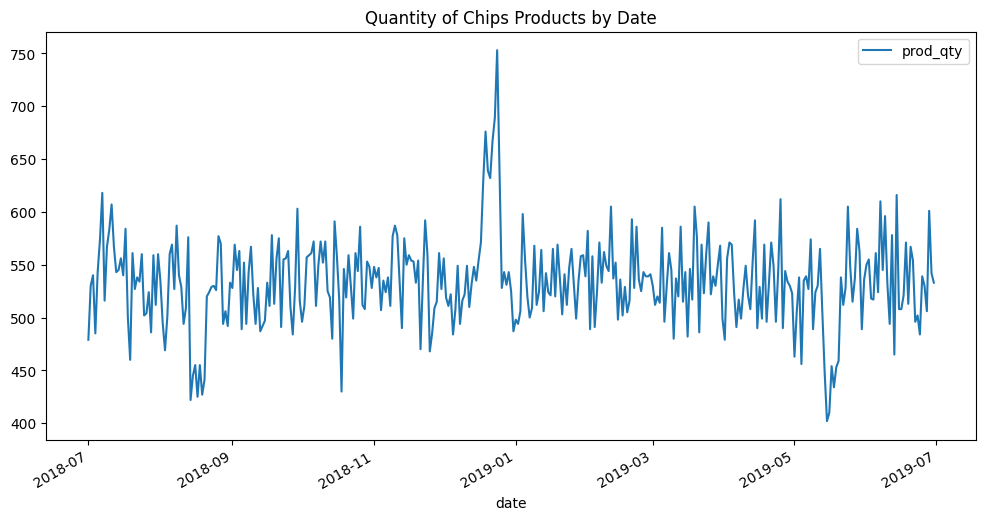

In [37]:
chips_products.groupby(['date']).agg({'prod_qty':'sum'}).sort_index().plot(figsize=(12, 6), title='Quantity of Chips Products by Date')

<Axes: title={'center': 'Sales of Chips Products by Date'}, xlabel='date'>

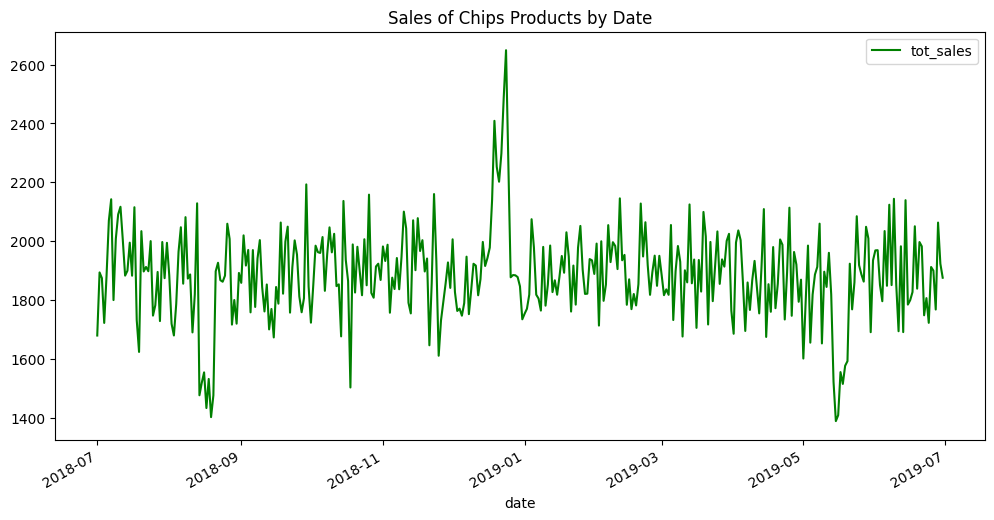

In [38]:
chips_products.groupby(['date']).agg({'tot_sales':'sum'}).sort_index().plot(figsize=(12, 6), color='green', title='Sales of Chips Products by Date')

In [39]:
chips_products['month'] = chips_products['date'].dt.to_period('M')


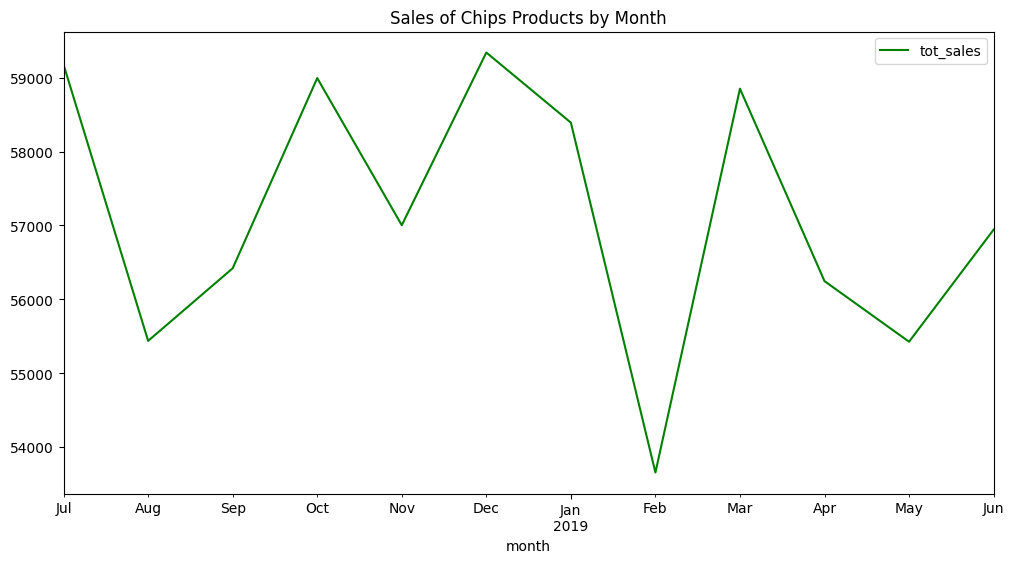

In [40]:
chips_products.groupby(['month']).agg({'tot_sales':'sum'}).sort_index().plot(figsize=(12, 6), color='green', title='Sales of Chips Products by Month');

<Axes: title={'center': 'December sales'}, xlabel='date'>

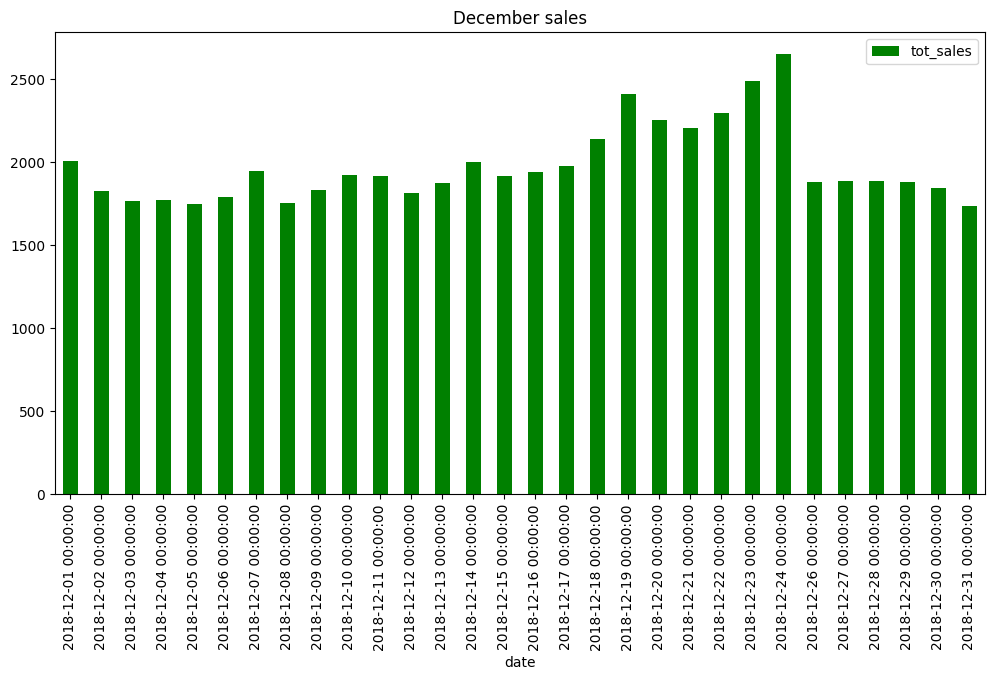

In [41]:
december_sales = chips_products[chips_products['month'] == '2018-12'].groupby(['date']).agg({'tot_sales':'sum'}).reset_index()
december_sales.plot(figsize=(12, 6), kind='bar', x='date', y='tot_sales', color='green', title= 'December sales')


#### <font color=blue> We have a gap in the data for 2018-12-25 and then a suspicious decline in sales from the 26th.
 </font>

In [42]:
december_sales.groupby(['date']).agg({'tot_sales':'sum'}).sort_index()

,tot_sales
date,
2018-12-01,2006.3
2018-12-02,1827.2
2018-12-03,1762.8
2018-12-04,1770.6
2018-12-05,1746.7
2018-12-06,1789.8
2018-12-07,1947.3
2018-12-08,1751.9
2018-12-09,1833.9


<Axes: title={'center': 'Quantity of Chips Products by Month'}, xlabel='month'>

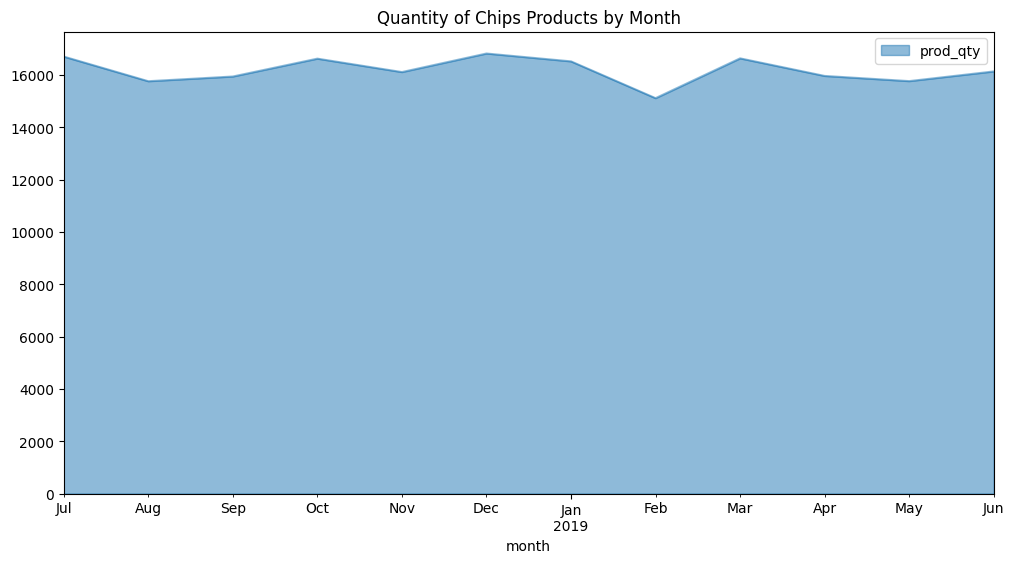

In [43]:
chips_products.groupby(['month']).agg({'prod_qty':'sum'}).sort_index().plot(figsize=(12, 6), kind='area',alpha=0.5,  title='Quantity of Chips Products by Month')

<Axes: title={'center': 'Sales of Chips Products by Month'}, xlabel='month'>

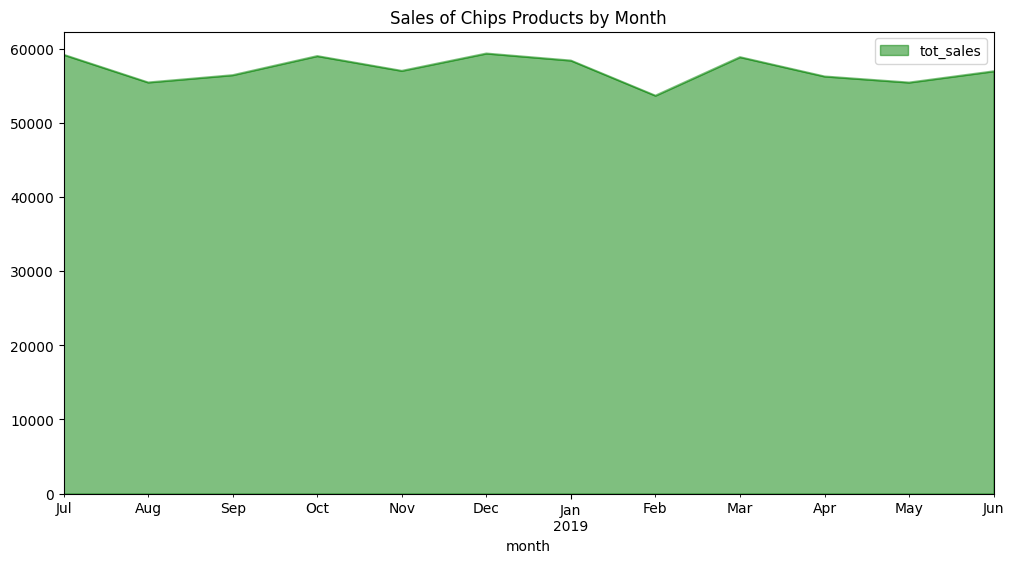

In [44]:
chips_products.groupby(['month']).agg({'tot_sales':'sum'}).sort_index().plot(figsize=(12, 6),kind='area',alpha=0.5, color='green', title='Sales of Chips Products by Month')

<Axes: title={'center': 'Quantity of Chips Products by Month and Weight Category'}, xlabel='month'>

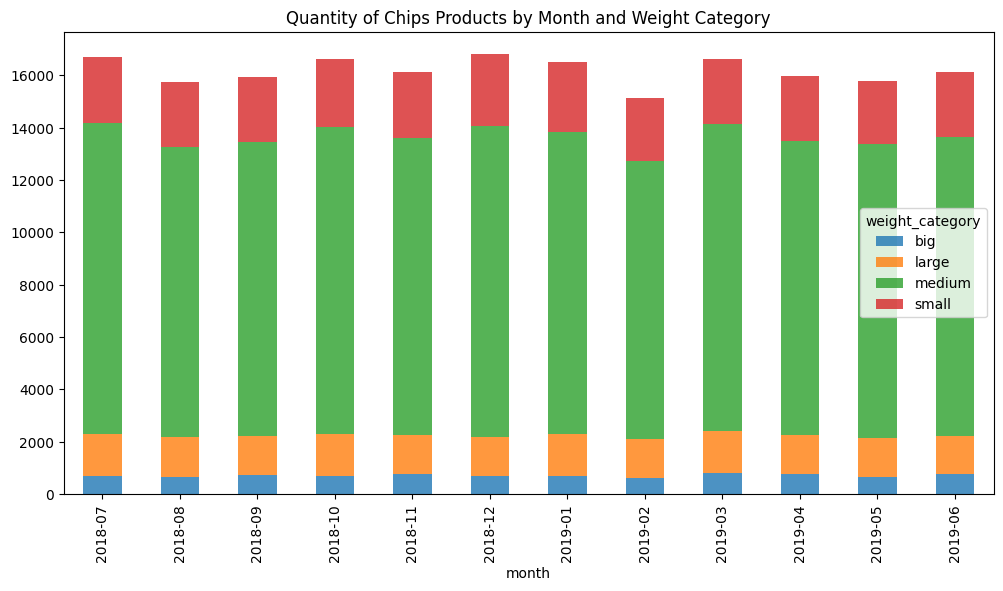

In [45]:
chips_products.pivot_table(index='month', columns='weight_category', values='prod_qty', aggfunc='sum')\
    .plot(figsize=(12, 6), kind='bar', stacked=True, alpha=0.8, title='Quantity of Chips Products by Month and Weight Category')


#### <font color=blue> Let's see how each brand is sold.
 </font>

In [46]:
chips_products.groupby(['brand']).agg({'tot_sales':['sum','mean'], 'prod_qty':['sum','mean']})\
    .sort_values(by=('tot_sales', 'sum'), ascending=False)

tot_sales           prod_qty          
               sum      mean      sum      mean
brand                                          
Doritos   166649.3  8.744781    36498  1.915202
Smiths    129237.8  7.659898    31999  1.896574
RRD        95046.0  5.345970    33646  1.892457
Thins      88852.5  6.312789    26929  1.913250
Cobs       70569.8  7.280491    18571  1.915919
Tyrrells   51647.4  8.017293    12298  1.909034
WW         26655.1  3.581231    14029  1.884858
Pringles   22355.4  7.081216     6043  1.914159
Natural    17265.0  5.679276     5755  1.893092
Sunbites    9676.4  3.216888     5692  1.892287
French      7929.0  5.591678     2643  1.863893

<Axes: title={'center': 'Sales by Brand'}, ylabel='brand'>

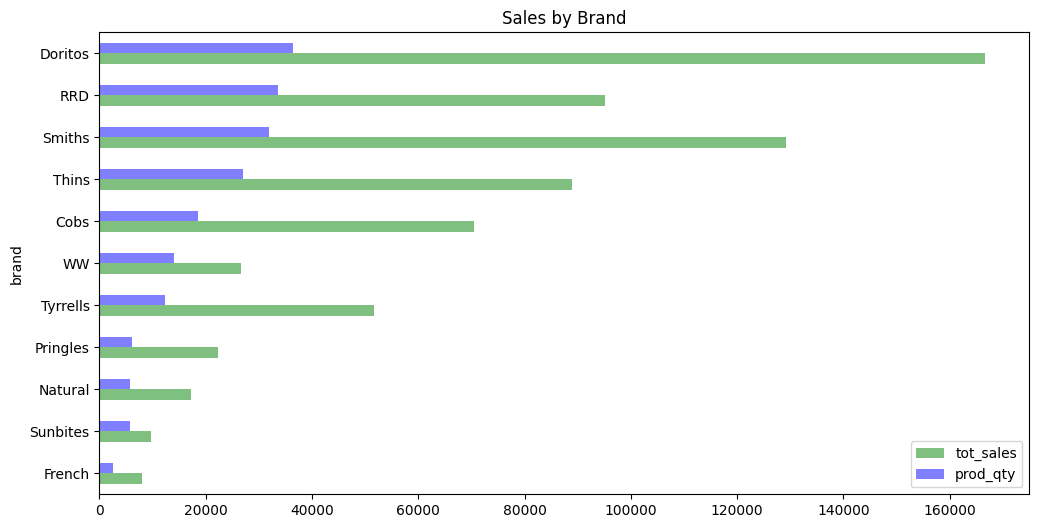

In [47]:
chips_products.groupby(['brand']).agg({'tot_sales':'sum', 'prod_qty':'sum'})\
    .sort_values(by='prod_qty')\
    .plot(figsize=(12, 6),kind='barh',alpha=0.5, color=[ 'green', 'blue'], title='Sales by Brand')

#### <font color=blue> Who is buying more chips?
 </font>

In [48]:
# sales by lifestage category 
chips_products.groupby(['lifestage']).agg(
    total_sales=('tot_sales', 'sum'),
    average_sales =('tot_sales','mean'),
    total_qty=('prod_qty', 'sum'),
    average_qty=('prod_qty', 'mean'), 
    count_sales=('tot_sales', 'count')).sort_values(by='count_sales', ascending=False)

,total_sales,average_sales,total_qty,average_qty,count_sales
lifestage,,,,,
OLDER SINGLES/COUPLES,140775.55,6.815898,39481,1.911543,20654
OLDER FAMILIES,129463.70,6.694436,37657,1.947205,19339
RETIREES,126699.10,6.772094,35295,1.886525,18709
YOUNG FAMILIES,115676.20,6.695774,33543,1.941595,17276
YOUNG SINGLES/COUPLES,91033.50,6.588514,25158,1.820800,13817
MIDAGE SINGLES/COUPLES,64854.00,6.759145,18176,1.894320,9595
NEW FAMILIES,17381.65,6.700713,4793,1.847726,2594


<Axes: title={'center': 'Sales by Lifestage'}, ylabel='lifestage'>

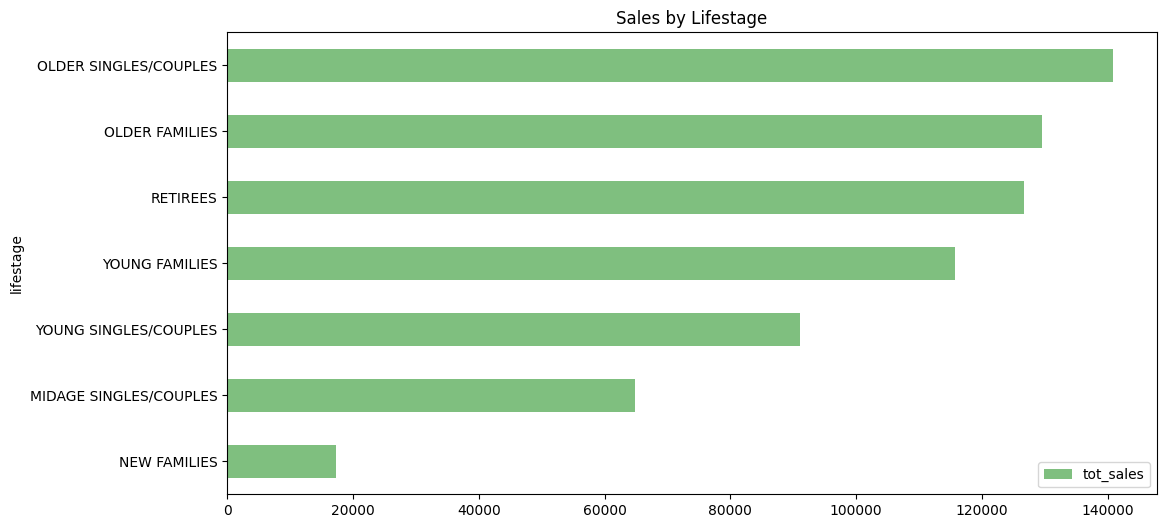

In [49]:
chips_products.groupby(['lifestage']).agg({'tot_sales':'sum'})\
    .sort_values(by='tot_sales')\
    .plot(figsize=(12, 6),kind='barh',alpha=0.5, color='green', title='Sales by Lifestage')

In [50]:
unique_clients_by_lifestage = chips_products.groupby(['lifestage']).agg(
    cnt_clients= ('lylty_card_nbr', 'nunique'), 
    total_sales= ('tot_sales', 'sum'),
    mean_sales= ('tot_sales', 'mean'), 
    count_sales= ('tot_sales', 'count')).reset_index()

unique_clients_by_lifestage['count_by_clients'] = unique_clients_by_lifestage['count_sales'] / unique_clients_by_lifestage['cnt_clients']
unique_clients_by_lifestage['sum_by_clients'] = unique_clients_by_lifestage['total_sales'] / unique_clients_by_lifestage['cnt_clients']
unique_clients_by_lifestage

,lifestage,cnt_clients,total_sales,mean_sales,count_sales,count_by_clients,sum_by_clients
0,MIDAGE SINGLES/COUPLES,4977,64854.00,6.759145,9595,1.927868,13.030741
1,NEW FAMILIES,1642,17381.65,6.700713,2594,1.579781,10.585658
2,OLDER FAMILIES,7473,129463.70,6.694436,19339,2.587850,17.324194
3,OLDER SINGLES/COUPLES,10538,140775.55,6.815898,20654,1.959954,13.358849
4,RETIREES,10259,126699.10,6.772094,18709,1.823667,12.350044
5,YOUNG FAMILIES,6963,115676.20,6.695774,17276,2.481114,16.612983
6,YOUNG SINGLES/COUPLES,8718,91033.50,6.588514,13817,1.584882,10.442017


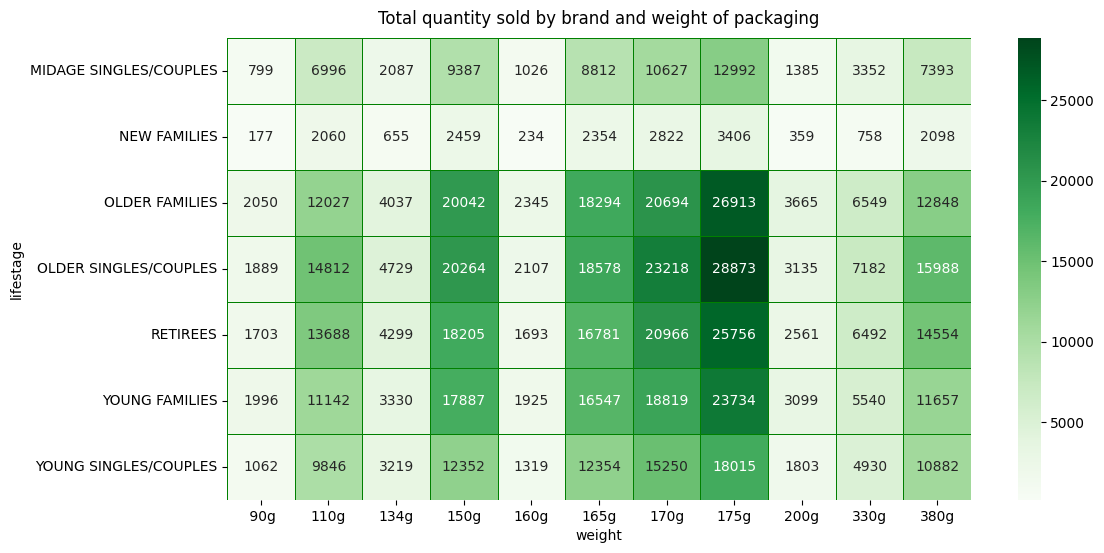

In [51]:
pivot_brand_weight = chips_products.pivot_table(
    index='lifestage',
    columns='weight',
    values='tot_sales',
    aggfunc='sum'

)
plt.figure(figsize=(12, 6))
plt.title('Total quantity sold by brand and weight of packaging',pad=10)

sns.heatmap(pivot_brand_weight, annot=True, fmt='.0f', cmap='Greens', linewidths=0.5, linecolor='green');

In [52]:
customers_df = chips_products.groupby(['premium_customer']).agg({'lylty_card_nbr':'nunique', 'tot_sales':'sum' }).reset_index()
customers_df['sum_by_clients'] = customers_df['tot_sales'] / customers_df['lylty_card_nbr']
customers_df

,premium_customer,lylty_card_nbr,tot_sales,sum_by_clients
0,Budget,17451,241698.65,13.850132
1,Mainstream,19836,264108.80,13.314620
2,Premium,13283,180076.25,13.556896


In [53]:
# sales by customer status
chips_products.groupby(['premium_customer']).agg(
    total_sales=('tot_sales', 'sum'),
    average_sales =('tot_sales','mean'),
    total_qty=('prod_qty', 'sum'),
    average_qty=('prod_qty', 'mean'),
    count_sales=('tot_sales', 'count')).sort_values(by='count_sales', ascending=False)

,total_sales,average_sales,total_qty,average_qty,count_sales
premium_customer,,,,,
Mainstream,264108.80,6.806051,73774,1.901147,38805
Budget,241698.65,6.671782,69023,1.905292,36227
Premium,180076.25,6.681369,51306,1.903606,26952


<Axes: title={'center': 'Sales by Premium_customer'}, ylabel='premium_customer'>

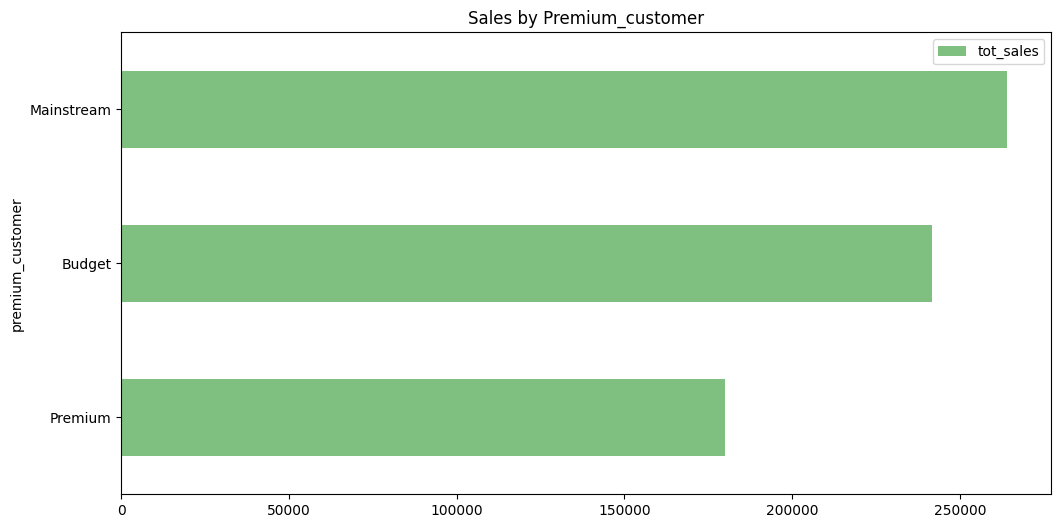

In [54]:
chips_products.groupby(['premium_customer']).agg({'tot_sales':'sum'})\
    .sort_values(by='tot_sales')\
    .plot(figsize=(12, 6),kind='barh',alpha=0.5, color='green', title='Sales by Premium_customer')

In [55]:
# sales by brand
chips_products.groupby(['brand']).agg(
    total_sales=('tot_sales', 'sum'),
    average_sales =('tot_sales','mean'),
    total_qty=('prod_qty', 'sum'),
    average_qty=('prod_qty', 'mean'), 
    count_sales = ('tot_sales', 'count')).sort_values(by='count_sales', ascending=False)

,total_sales,average_sales,total_qty,average_qty,count_sales
brand,,,,,
Doritos,166649.3,8.744781,36498,1.915202,19057
RRD,95046.0,5.345970,33646,1.892457,17779
Smiths,129237.8,7.659898,31999,1.896574,16872
Thins,88852.5,6.312789,26929,1.913250,14075
Cobs,70569.8,7.280491,18571,1.915919,9693
WW,26655.1,3.581231,14029,1.884858,7443
Tyrrells,51647.4,8.017293,12298,1.909034,6442
Pringles,22355.4,7.081216,6043,1.914159,3157
Natural,17265.0,5.679276,5755,1.893092,3040


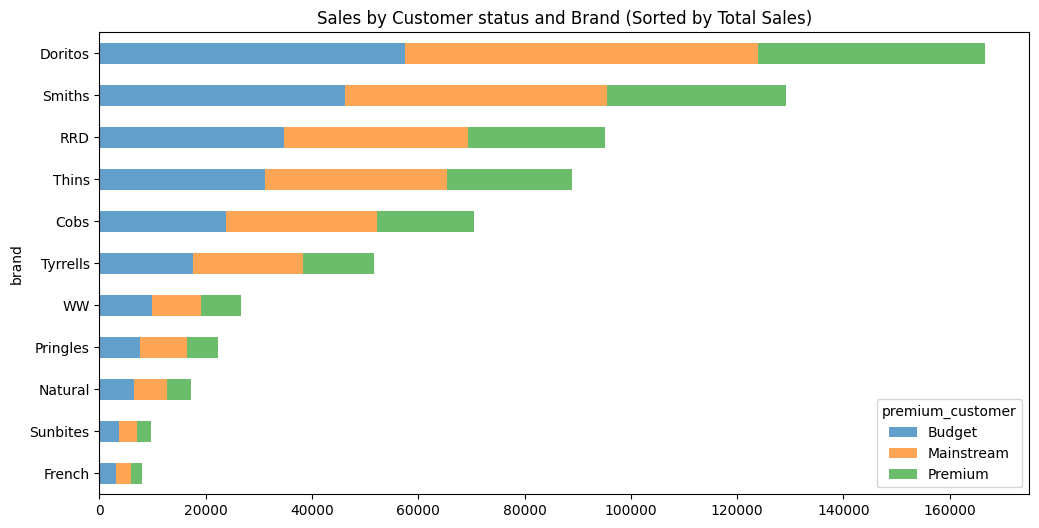

In [56]:

pivot_brand_customer = chips_products.pivot_table(
    index='brand', 
    columns='premium_customer', 
    values='tot_sales', 
    aggfunc='sum'
)

# Sort by premium_customer
pivot_sorted = pivot_brand_customer.sort_values(by=pivot_brand_customer.columns.tolist(), 
                               ascending=True,  
                               axis=0)         # sort by index (rows)


pivot_sorted.plot(
    figsize=(12, 6), 
    kind='barh', 
    stacked=True, 
    alpha=0.7, 
    title='Sales by Customer status and Brand (Sorted by Total Sales)'
)
plt.show()

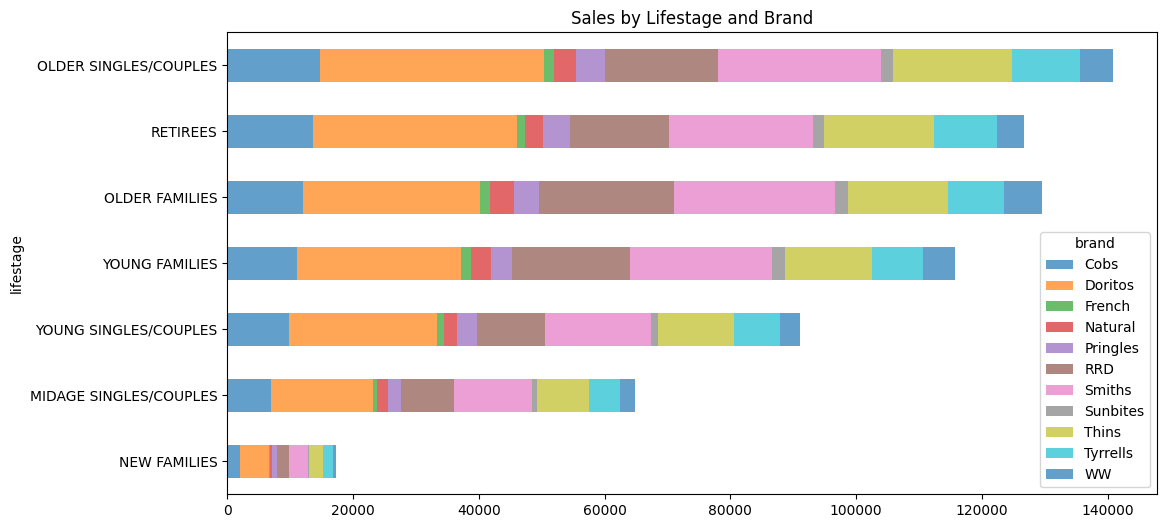

In [57]:
pivot_lifestage_brand = chips_products.pivot_table(index='lifestage', columns='brand', values='tot_sales', aggfunc='sum')

pivot_2_sorted = pivot_lifestage_brand.sort_values(by=pivot_lifestage_brand.columns.tolist(),
                                ascending=True,
                                axis=0)         

pivot_2_sorted.plot(
    figsize=(12, 6), 
    kind='barh', 
    stacked=True, 
    alpha=0.7,
    title='Sales by Lifestage and Brand'
)
plt.show()


In [58]:
pivot_brands_lifestage_qty = chips_products.pivot_table(
    index='brand', 
    columns='lifestage',
    values='prod_qty', 
    aggfunc={'sum'}
)


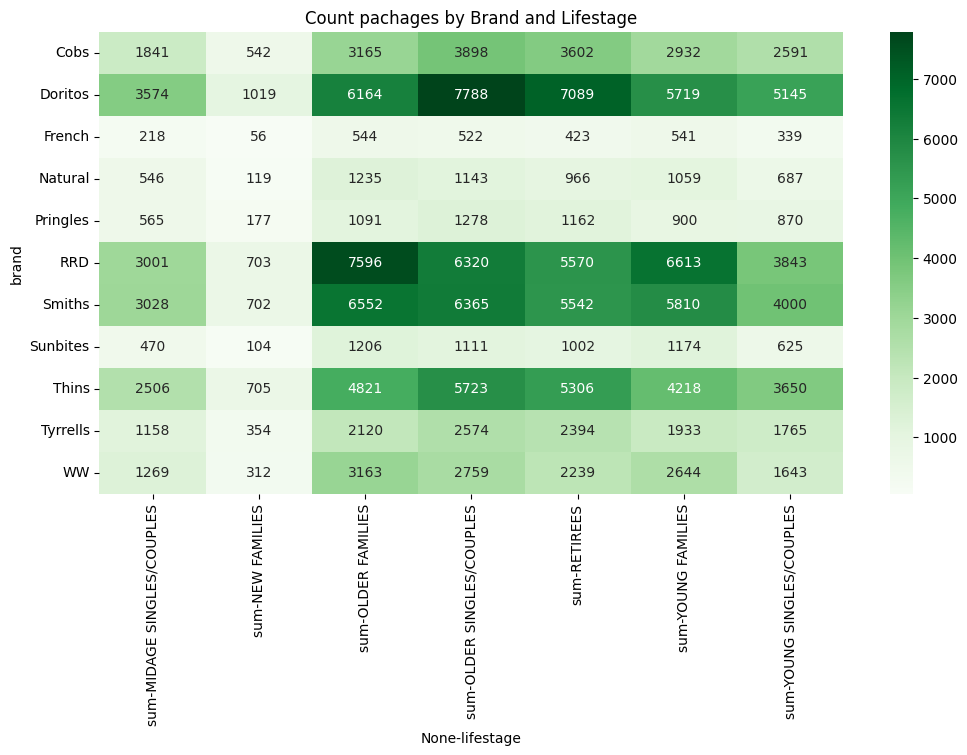

In [59]:

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_brands_lifestage_qty, annot=True, fmt='.0f', cmap='Greens', cbar=True)
plt.title('Count pachages by Brand and Lifestage');


In [60]:
pivot = chips_products.pivot_table(
    index='brand', 
    columns='premium_customer', 
    values='tot_sales', 
    aggfunc='sum',

)

pivot_2 = chips_products.pivot_table(
    index='brand', 
    columns='lifestage', 
    values='tot_sales', 
    aggfunc='sum',

)

pivot_3 = chips_products.pivot_table(
    index='weight',
    columns='lifestage', 
    values='tot_sales', 
    aggfunc='sum',

)

percentage_total = pivot.div(pivot.sum().sum()) * 100
percentage_by_column = pivot.apply(lambda x: x/x.sum() * 100)
percentage_by_row = pivot.apply(lambda x: x/x.sum() * 100, axis=1)

percentage_total = percentage_total.round(2)
percentage_by_column = percentage_by_column.round(2)
percentage_by_row = percentage_by_row.round(2)


percentage_total_2 = pivot_2.div(pivot_2.sum().sum()) * 100
percentage_by_column_2 = pivot_2.apply(lambda x: x/x.sum() * 100)
percentage_by_row_2 = pivot_2.apply(lambda x: x/x.sum() * 100, axis=1)

percentage_total_2 = percentage_total_2.round(2)
percentage_by_column_2 = percentage_by_column_2.round(2)
percentage_by_row_2 = percentage_by_row_2.round(2)

percentage_total_3 = pivot_3.div(pivot_3.sum().sum()) * 100
percentage_by_column_3 = pivot_3.apply(lambda x: x/x.sum() * 100)
percentage_by_row_3 = pivot_3.apply(lambda x: x/x.sum() * 100, axis=1)

percentage_total_3 = percentage_total_3.round(2)
percentage_by_column_3 = percentage_by_column_3.round(2)
percentage_by_row_3 = percentage_by_row_3.round(2)


<Axes: xlabel='lifestage', ylabel='weight'>

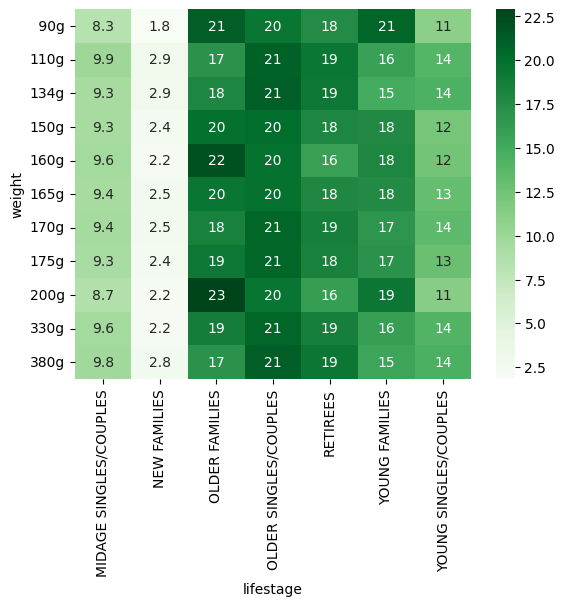

In [61]:
sns.heatmap(percentage_by_row_3, annot=True, cmap='Greens')

In [62]:
percentage_total.sum(axis=1).sort_values(ascending=False)

brand
Doritos     24.30
Smiths      18.85
RRD         13.86
Thins       12.95
Cobs        10.30
Tyrrells     7.53
WW           3.88
Pringles     3.26
Natural      2.51
Sunbites     1.41
French       1.15
dtype: float64

In [63]:
percentage_total.sum(axis=0).sort_values(ascending=False)

premium_customer
Mainstream    38.50
Budget        35.23
Premium       26.27
dtype: float64

In [64]:
percentage_total_2.sum(axis=0).sort_values(ascending=False)

lifestage
OLDER SINGLES/COUPLES     20.53
OLDER FAMILIES            18.88
RETIREES                  18.49
YOUNG FAMILIES            16.87
YOUNG SINGLES/COUPLES     13.28
MIDAGE SINGLES/COUPLES     9.47
NEW FAMILIES               2.55
dtype: float64

<Axes: xlabel='lifestage', ylabel='brand'>

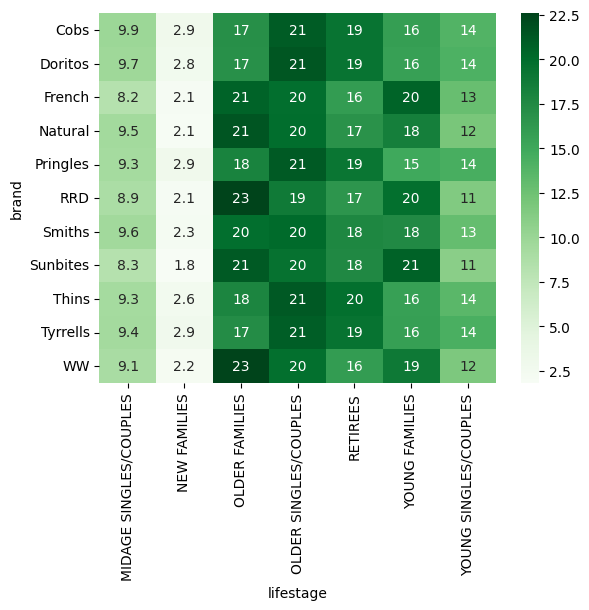

In [65]:
sns.heatmap(percentage_by_row_2, annot=True, cmap='Greens')

<Axes: xlabel='lifestage', ylabel='brand'>

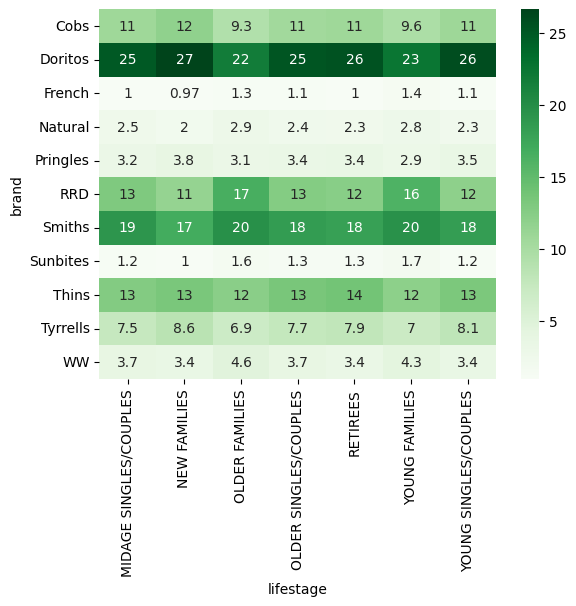

In [66]:
sns.heatmap(percentage_by_column_2, annot=True, cmap='Greens')

In [67]:
chips_products.to_csv('.\\data\\QVI_chips_products_result.csv', index=False)

## Results

More than all sales in medium-sized packs.
Top 5 weights by sales amount:

- 175g -   20.3%  
- 170g -   16.3%  
- 150g -   14.6%  
- 165g -   13.6%  
- 380g -  10.9%   


Before Christmas, sales increase, after Christmas in February there was a noticeable decline.
At Christmas, the stores did not work.

Purchases do not differ in customer status, but more sales to groups with Mainstream status due to the fact that there are more of them.

Older families and young families have similar preferences and they differ from the preferences of other groups. These two groups spend more on chips per customer, and made an average of 2.5 purchases per customer per year. They are also more inclined to buy brands such as RRD and Smith.

The main clients of chips are old and young families, pensioners and old single people.
Full distribution of sales by groups:  

- OLDER SINGLES/COUPLES -   20.53%  
- OLDER FAMILIES  -          18.88%  
- RETIREES   -               18.49%  
- YOUNG FAMILIES  -          16.87%  
- YOUNG SINGLES/COUPLES  -   13.28%  
- MIDAGE SINGLES/COUPLES  -   9.47%  
- NEW FAMILIES   -            2.55%  



Top 5 brands in terms of sales:  

- Doritos -    24.30%  
- Smiths -     18.85%    
- RRD  -       13.86%    
- Thins  -     12.95%    
- Cobs -       10.30%    

## Recommendation

- Arrange shelves with chips closer to the goods that are inherent in shopping for couples.
- Offer chips as a complement to family packs.
- Make themed stands for watching movies with drinks and chips.


